### 😺 딥러닝 CNN 프로젝트 03 - 개 / 고양이 분류 프로젝트
- 개 또는 고양이 이미지 약 37,000개 (고용량)

#### 예시

<div style='display: flex; margin-left: 10px;'>
    <div>
        <img src='../datasets/dogs_cats/train/dogs/dog.10.jpg' width='200px'>
    </div>
    <div>
        <img src='../datasets/dogs_cats/train/dogs/dog.0.jpg' width='200px' style='margin-left: 15px;'>
    </div>
    <div>
        <img src='../datasets/dogs_cats/train/cats/cat.100.jpg' width='200px' style='margin-left: 15px;'>
    </div>
    <div>
        <img src='../datasets/dogs_cats/train/cats/cat.1.jpg' width='200px' style='margin-left: 15px;'>
    </div>
</div>

### 💻 데이터 전처리
- train, validation, test가 분리되어있는 데이터 세트
- 따라서 각각의 DataFrame을 생성

In [1]:
# 이미지와 배치 사이즈 설정
IMAGE_SIZE = 64
BATCH_SIZE = 20

#### train DataFrame

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = '../datasets/dogs_cats/train/'

# ImageDataGenerator 선언 - RGB 값을 0 ~ 1사이로 스케일링만
image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical')

print(generator.class_indices)

Found 20000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [3]:
# class_indices의 key: value 순서를 반대로 한 새로운 dict 생성
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'cats', 1: 'dogs'}

In [4]:
target_names = []

# 반복문으로 위 dict의 문자열(value)을 target_names에 추가
for target in generator.classes:
    target_names.append(target_name[target])

In [5]:
import pandas as pd

# 경로, target_names(list) 및 target 클래스로 데이터프레임 생성
train_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names ,'targets': generator.classes})

# file_path의 '\\'를 '/'로 대체
train_df.loc[:, 'file_paths'] = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

train_df

file_paths target_names  targets
0          ../datasets/dogs_cats/train/cats/cat.0.jpg         cats        0
1          ../datasets/dogs_cats/train/cats/cat.1.jpg         cats        0
2        ../datasets/dogs_cats/train/cats/cat.100.jpg         cats        0
3       ../datasets/dogs_cats/train/cats/cat.1000.jpg         cats        0
4      ../datasets/dogs_cats/train/cats/cat.10001.jpg         cats        0
...                                               ...          ...      ...
19995   ../datasets/dogs_cats/train/dogs/dog.9994.jpg         dogs        1
19996   ../datasets/dogs_cats/train/dogs/dog.9995.jpg         dogs        1
19997   ../datasets/dogs_cats/train/dogs/dog.9997.jpg         dogs        1
19998   ../datasets/dogs_cats/train/dogs/dog.9998.jpg         dogs        1
19999   ../datasets/dogs_cats/train/dogs/dog.9999.jpg         dogs        1

[20000 rows x 3 columns]

#### validation DataFrame

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = '../datasets/dogs_cats/validation/'

# ImageDataGenerator 선언 - RGB 값을 0 ~ 1사이로 스케일링만
image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical')

print(generator.class_indices)

Found 5000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [7]:
# class_indices의 key: value 순서를 반대로 한 새로운 dict 생성
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'cats', 1: 'dogs'}

In [8]:
target_names = []

# 반복문으로 위 dict의 문자열(value)을 target_names에 추가
for target in generator.classes:
    target_names.append(target_name[target])

In [9]:
import pandas as pd

# 경로, target_names(list) 및 target 클래스로 데이터프레임 생성
validation_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names ,'targets': generator.classes})

# file_path의 '\\'를 '/'로 대체
validation_df.loc[:, 'file_paths'] = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df

file_paths target_names  targets
0      ../datasets/dogs_cats/validation/cats/cat.10.jpg         cats        0
1     ../datasets/dogs_cats/validation/cats/cat.1000...         cats        0
2     ../datasets/dogs_cats/validation/cats/cat.1000...         cats        0
3     ../datasets/dogs_cats/validation/cats/cat.1000...         cats        0
4     ../datasets/dogs_cats/validation/cats/cat.1000...         cats        0
...                                                 ...          ...      ...
4995  ../datasets/dogs_cats/validation/dogs/dog.9974...         dogs        1
4996  ../datasets/dogs_cats/validation/dogs/dog.9981...         dogs        1
4997  ../datasets/dogs_cats/validation/dogs/dog.9983...         dogs        1
4998  ../datasets/dogs_cats/validation/dogs/dog.9986...         dogs        1
4999  ../datasets/dogs_cats/validation/dogs/dog.9996...         dogs        1

[5000 rows x 3 columns]

#### test DataFrame

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = '../datasets/dogs_cats/test/'

# ImageDataGenerator 선언 - RGB 값을 0 ~ 1사이로 스케일링만
image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical')

print(generator.class_indices)

Found 12461 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [11]:
# class_indices의 key: value 순서를 반대로 한 새로운 dict 생성
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'cats', 1: 'dogs'}

In [12]:
target_names = []

# 반복문으로 위 dict의 문자열(value)을 target_names에 추가
for target in generator.classes:
    target_names.append(target_name[target])

In [13]:
import pandas as pd

# 경로, target_names(list) 및 target 클래스로 데이터프레임 생성
test_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names ,'targets': generator.classes})

# file_path의 '\\'를 '/'로 대체
test_df.loc[:, 'file_paths'] = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df

file_paths target_names  targets
0         ../datasets/dogs_cats/test/cats/cat (1).jpg         cats        0
1        ../datasets/dogs_cats/test/cats/cat (10).jpg         cats        0
2       ../datasets/dogs_cats/test/cats/cat (100).jpg         cats        0
3      ../datasets/dogs_cats/test/cats/cat (1000).jpg         cats        0
4      ../datasets/dogs_cats/test/cats/cat (1001).jpg         cats        0
...                                               ...          ...      ...
12456   ../datasets/dogs_cats/test/dogs/dog (995).jpg         dogs        1
12457   ../datasets/dogs_cats/test/dogs/dog (996).jpg         dogs        1
12458   ../datasets/dogs_cats/test/dogs/dog (997).jpg         dogs        1
12459   ../datasets/dogs_cats/test/dogs/dog (998).jpg         dogs        1
12460   ../datasets/dogs_cats/test/dogs/dog (999).jpg         dogs        1

[12461 rows x 3 columns]

### 💻 모델 선정
- 이하의 사전 훈련 모델 중 프로젝트에 사용할 모델 선정
> - VGG16
> - Resnet50V2
> - Xception
> - MobileNetV2
- 유사도가 높은 모델들을 프로젝트에 사용

#### VGG16

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image 1:
('n02948072', 'candle', 0.13157766)
candle 13.1578%


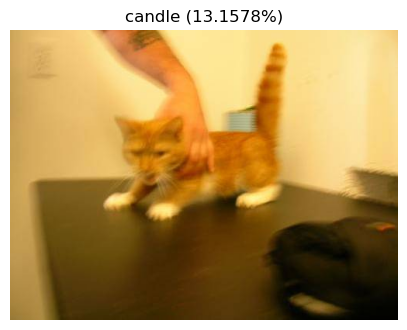



Image 2:
('n02123045', 'tabby', 0.54908025)
tabby 54.908%


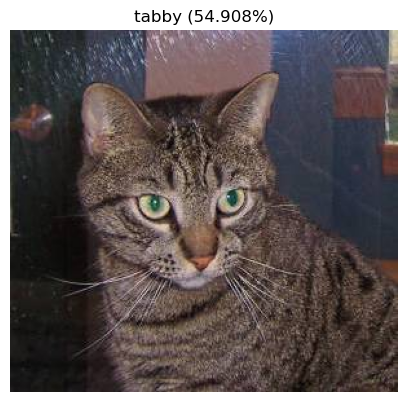



Image 3:
('n03958227', 'plastic_bag', 0.41698548)
plastic_bag 41.6985%


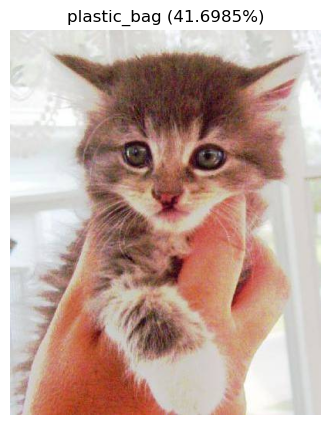



Image 4:
('n02123597', 'Siamese_cat', 0.46127763)
Siamese_cat 46.1278%


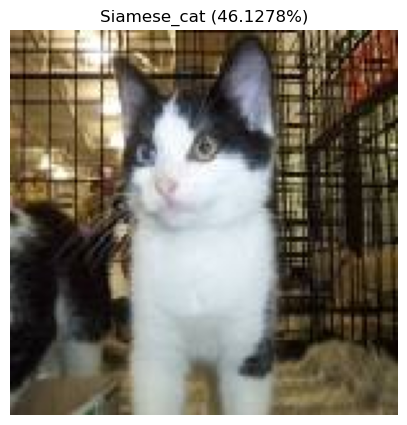



Image 5:
('n02102318', 'cocker_spaniel', 0.43166867)
cocker_spaniel 43.1669%


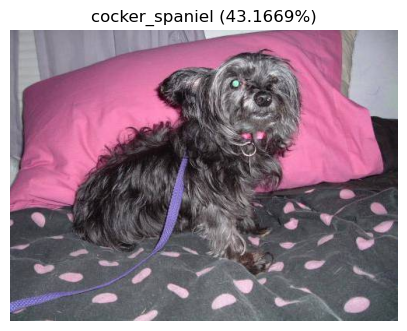



Image 6:
('n02093256', 'Staffordshire_bullterrier', 0.8446727)
Staffordshire_bullterrier 84.4673%


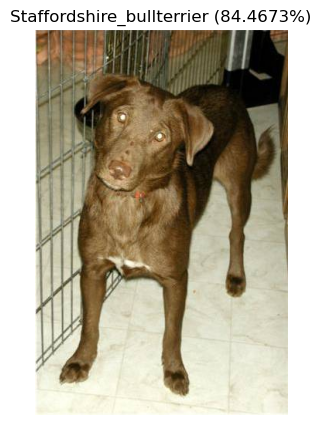



Image 7:
('n02102040', 'English_springer', 0.313864)
English_springer 31.3864%


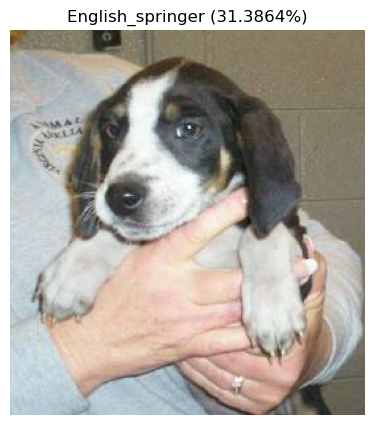



Image 8:
('n02098286', 'West_Highland_white_terrier', 0.5119712)
West_Highland_white_terrier 51.1971%


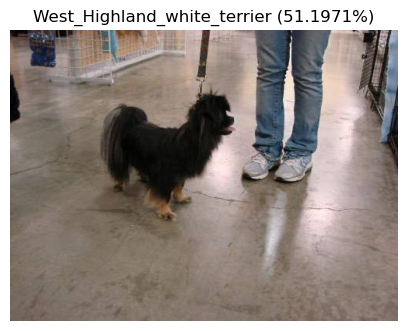

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# VGG16 모델
model = VGG16(weights='imagenet')

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/dogs_cats/train/cats/cat.0.jpg',
    '../datasets/dogs_cats/train/cats/cat.1.jpg',
    '../datasets/dogs_cats/train/cats/cat.100.jpg',
    '../datasets/dogs_cats/train/cats/cat.1000.jpg',
    '../datasets/dogs_cats/train/dogs/dog.0.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1.jpg',
    '../datasets/dogs_cats/train/dogs/dog.10.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1000.jpg'
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### Resnet50V2

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image 1:
('n04009552', 'projector', 0.27589694)
projector 27.5897%


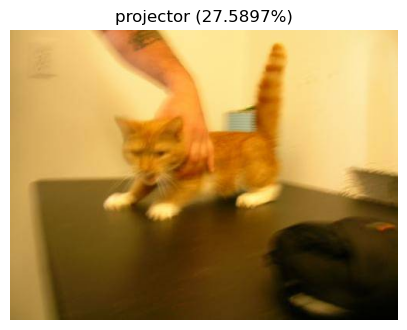



Image 2:
('n02123045', 'tabby', 0.71749264)
tabby 71.7493%


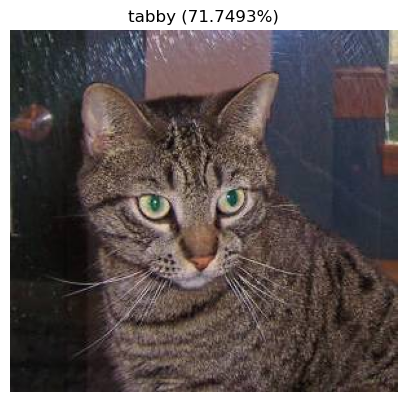



Image 3:
('n02123394', 'Persian_cat', 0.2384464)
Persian_cat 23.8446%


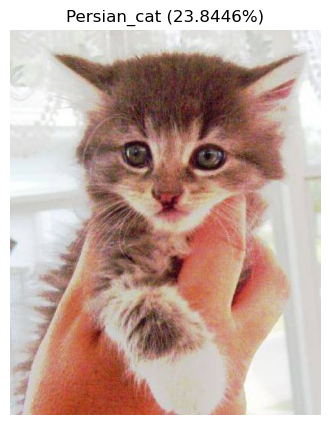



Image 4:
('n02123597', 'Siamese_cat', 0.9230649)
Siamese_cat 92.3065%


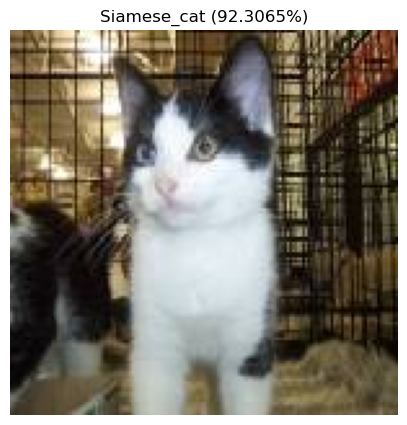



Image 5:
('n02088094', 'Afghan_hound', 0.44494885)
Afghan_hound 44.4949%


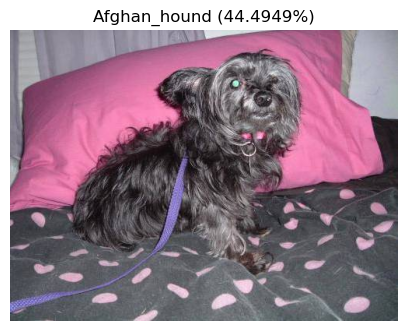



Image 6:
('n02093256', 'Staffordshire_bullterrier', 0.4273841)
Staffordshire_bullterrier 42.7384%


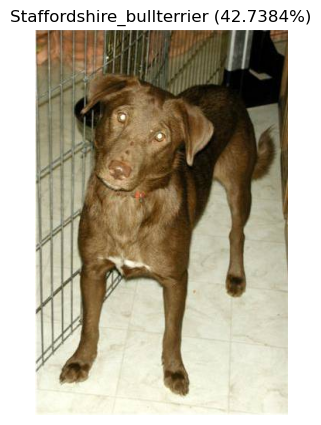



Image 7:
('n02089867', 'Walker_hound', 0.33573782)
Walker_hound 33.5738%


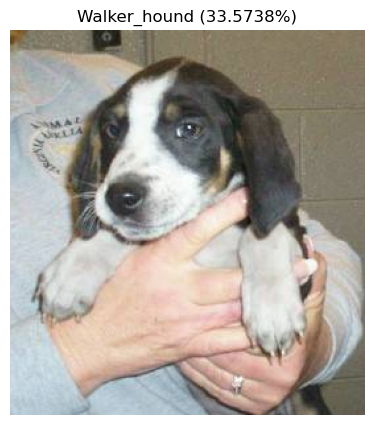



Image 8:
('n02096177', 'cairn', 0.8066446)
cairn 80.6645%


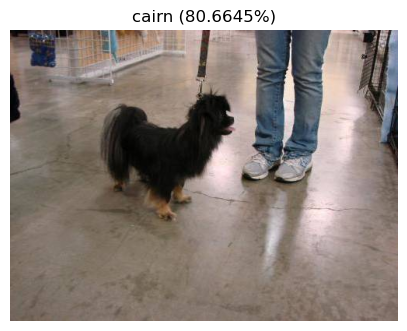

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# ResNet50 모델
model = ResNet50(weights='imagenet')

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/dogs_cats/train/cats/cat.0.jpg',
    '../datasets/dogs_cats/train/cats/cat.1.jpg',
    '../datasets/dogs_cats/train/cats/cat.100.jpg',
    '../datasets/dogs_cats/train/cats/cat.1000.jpg',
    '../datasets/dogs_cats/train/dogs/dog.0.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1.jpg',
    '../datasets/dogs_cats/train/dogs/dog.10.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1000.jpg'
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### Xception

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image 1:
('n04127249', 'safety_pin', 1.0)
safety_pin 100.0%


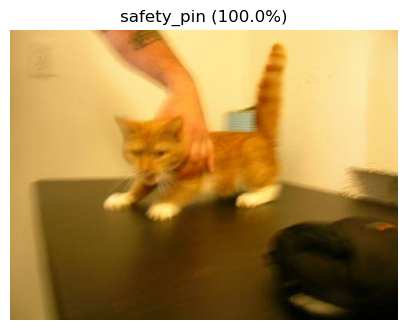



Image 2:
('n02666196', 'abacus', 0.87864435)
abacus 87.8644%


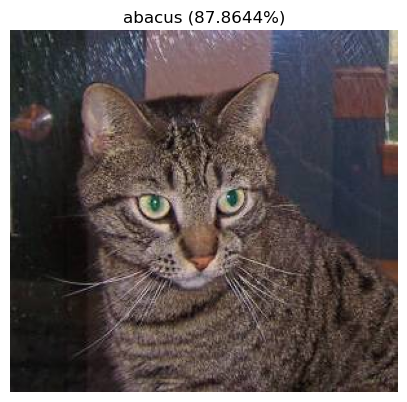



Image 3:
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


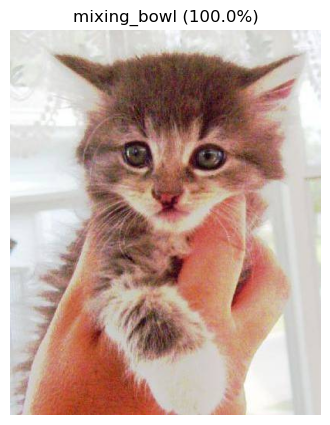



Image 4:
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


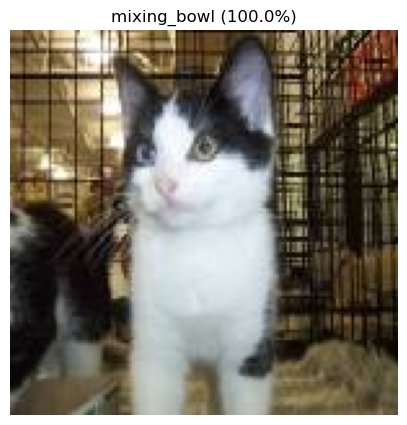



Image 5:
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


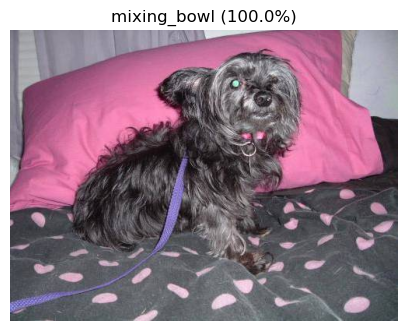



Image 6:
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


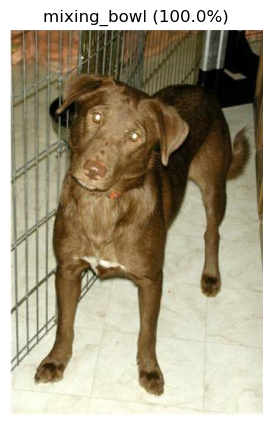



Image 7:
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


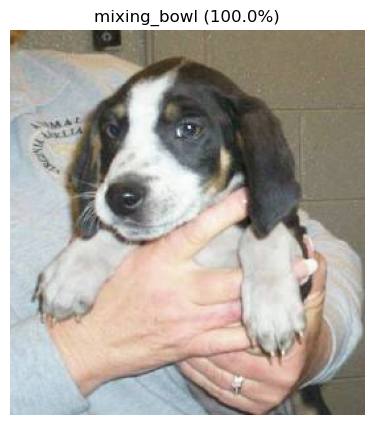



Image 8:
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


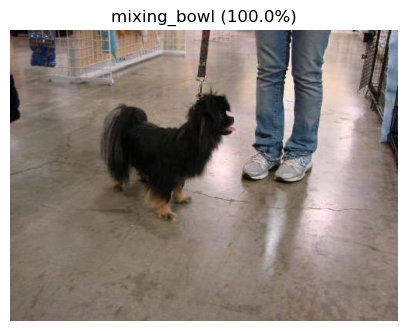

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import Xception, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# Xception 모델
model = Xception(weights='imagenet')

# 이미지 로드 및 전처리 함수
# Xception 모델은 size 다르게 설정
def load_and_preprocess_image(img_path, target_size=(299, 299)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/dogs_cats/train/cats/cat.0.jpg',
    '../datasets/dogs_cats/train/cats/cat.1.jpg',
    '../datasets/dogs_cats/train/cats/cat.100.jpg',
    '../datasets/dogs_cats/train/cats/cat.1000.jpg',
    '../datasets/dogs_cats/train/dogs/dog.0.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1.jpg',
    '../datasets/dogs_cats/train/dogs/dog.10.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1000.jpg'
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### MobileNetV2

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
Image 1:
('n04209239', 'shower_curtain', 0.31180453)
shower_curtain 31.1805%


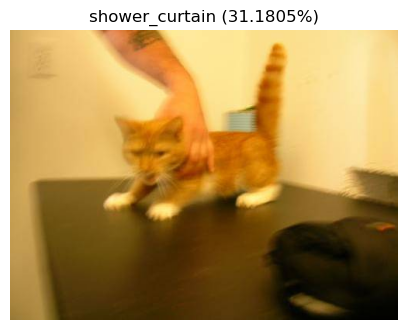



Image 2:
('n04209239', 'shower_curtain', 0.7967888)
shower_curtain 79.6789%


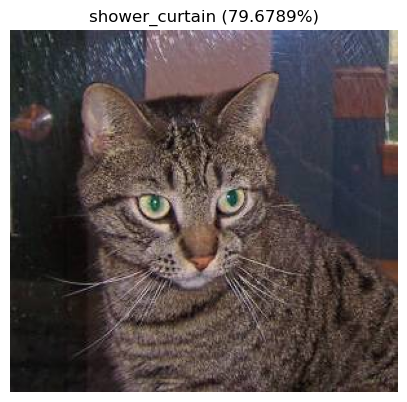



Image 3:
('n04209239', 'shower_curtain', 0.53344876)
shower_curtain 53.3449%


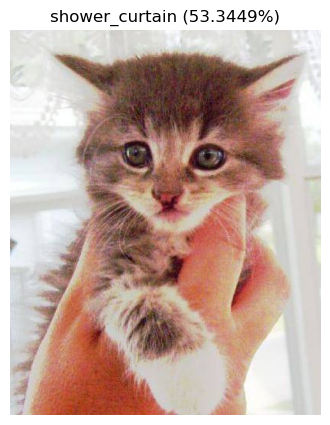



Image 4:
('n04209239', 'shower_curtain', 0.9686294)
shower_curtain 96.8629%


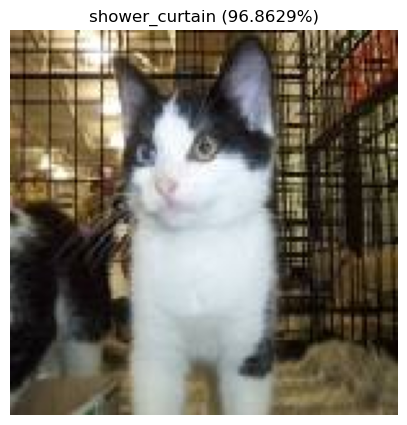



Image 5:
('n03938244', 'pillow', 0.35277972)
pillow 35.278%


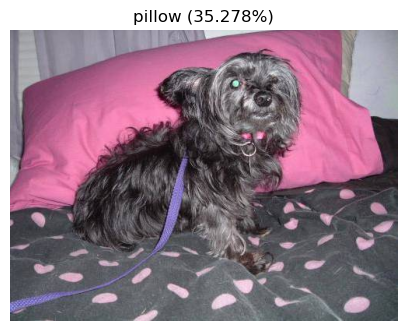



Image 6:
('n04209239', 'shower_curtain', 0.77362907)
shower_curtain 77.3629%


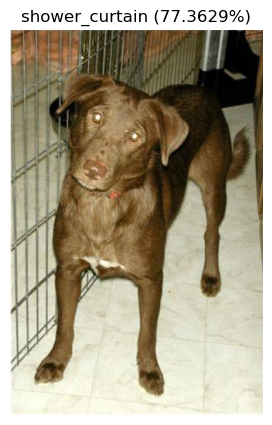



Image 7:
('n03291819', 'envelope', 0.20695885)
envelope 20.6959%


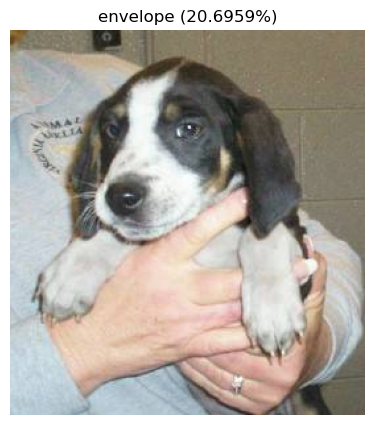



Image 8:
('n04209239', 'shower_curtain', 0.9751922)
shower_curtain 97.5192%


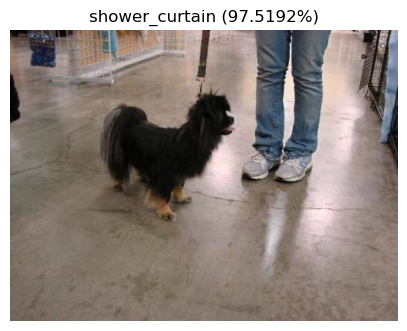

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# MobileNet 모델
model = MobileNet(weights='imagenet')

# 이미지 로드 및 전처리 함수
# Xception 모델은 size 다르게 설정
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/dogs_cats/train/cats/cat.0.jpg',
    '../datasets/dogs_cats/train/cats/cat.1.jpg',
    '../datasets/dogs_cats/train/cats/cat.100.jpg',
    '../datasets/dogs_cats/train/cats/cat.1000.jpg',
    '../datasets/dogs_cats/train/dogs/dog.0.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1.jpg',
    '../datasets/dogs_cats/train/dogs/dog.10.jpg',
    '../datasets/dogs_cats/train/dogs/dog.1000.jpg'
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

### 모델 선정 결과
- 유사도가 가장 높은 VGG16과 Resnet50V2를 선정

### 🚩 1st Cycle - VGG16

#### 스케일링 방식 확인 (Tensorflow / Torch)

In [19]:
# 이미지의 RGB 값 분포를 히스토그램으로 시각화하는 함수
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    titles = ['Red', 'Green', 'Blue']
    for i in range(3):
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        title_str = titles[i]
        axs[i].set(title=title_str)

In [20]:
def preprocessing_scaling(image, mode='tf'):
    # Tensorflow의 경우, -1 ~ 1 사이로 RGB 값 스케일링
    if mode == 'tf':
        image = image / 127.5
        image -= 1.

    # PyTorch의 경우, z-score로 RGB 값 스케일링
    elif mode == 'torch':
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

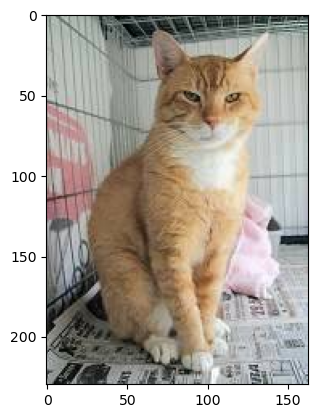

In [21]:
import cv2
import matplotlib.pyplot as plt

# 무작위로 고른 이미지 출력
image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[365]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

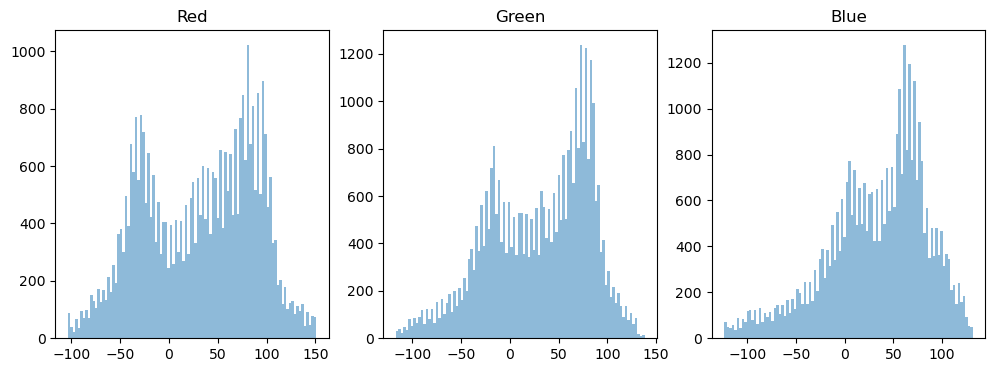

In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

# RGB를 전처리한 결과를 히스토그램으로 시각화
scaled_image_vgg = vgg_preprocess_input(image)
show_pixel_histogram(scaled_image_vgg)

#### 중간 분석
- VGG16은 TensorFlow 방식으로 스케일링 함

#### flow 생성
> - 위의 DataFrame으로부터 flow

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 데이터 전처리 함수 - 스케일링
def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf':
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch':
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

# VGG16 모델을 사용하기 때문에, 해당 모델의 스케일링 방식인 tf 사용 (tf가 default라 따로 기재 안 함)
train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

# 각 dataframe으로부터 flow한 train, validation, test flow 생성 - 모델 fit 및 evalutaion 용도
train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='binary',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                           x_col='file_paths', 
                                                           y_col='target_names',
                                                           target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                           class_mode='binary')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                               x_col='file_paths', 
                                               y_col='target_names',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode='binary')

# 각 flow의 클래스 종류 출력 (제대로 생성되었는지 확인)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12461 validated image filenames belonging to 2 classes.
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


#### 모델 생성 및 학습

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 모델 생성 함수
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    # 입력받은 model_name에 따라 다른 모델 사용
    # VGG16
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # ResNet50V2
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Xception (Inception 기반)
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Mobilenet
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 모델의 출력값을 변수 x에 할당
    x = model.output

    # Classifier
    # VGG16 이외의 모델은 층 구조가 깊기 때문에 Dropout 사용 
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
        
    x = Dense(200, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # 이미지 데이터의 클래스가 binary였기 때문에 Dense는 1로 지정
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)

    # 함수의 verbose 파라미터를 True로 설정 시, 모델 객체 생성과 함께 구조도 같이 출력
    if verbose:
        model.summary()

    # 모델 객체 반환
    return model

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

# VGG16 모델 생성 (+ 모델 구조 출력)
model = create_model(model_name='vgg16', verbose=True)

# 모델 컴파일링
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         102,6

 Total params: 14,817,489 (56.52 MB)

 Trainable params: 14,817,489 (56.52 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/vgg16/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [33]:
import gc

# Garbage Collecting
gc.collect()

966

In [34]:
N_EPOCHS = 20

# 모델 학습
history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS,
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 837s 1s/step - acc: 0.5571 - loss: 0.8473 - val_acc: 0.7624 - val_loss: 0.4919 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - acc: 0.7720 - loss: 0.4779 - val_acc: 0.8488 - val_loss: 0.3630 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - acc: 0.8382 - loss: 0.3599 - val_acc: 0.8016 - val_loss: 0.4231 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 919s 1s/step - acc: 0.8394 - loss: 0.3719 - val_acc: 0.8552 - val_loss: 0.3447 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 958s 2s/step - acc: 0.8738 - loss: 0.2965 - val_acc: 0.8864 - val_loss: 0.2756 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - acc: 0.8943 - loss: 0.2619 - val_acc: 0.8790 - val_loss: 0.2874 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 918s 1s/step - acc: 0.9128 - loss: 0.2171 - val_acc: 0.8726 - val_loss: 0.3034 - learning_rate: 0.0010

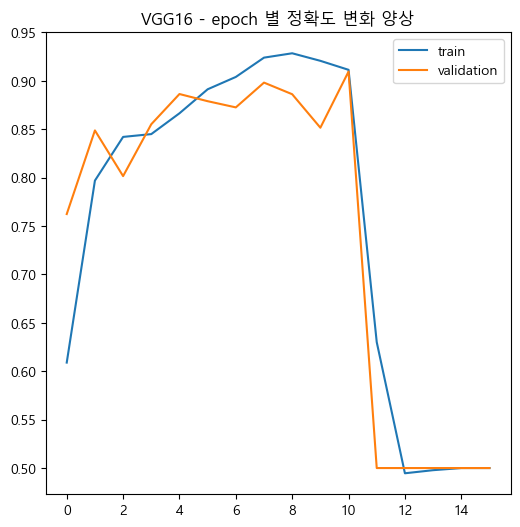

In [36]:
import matplotlib.pyplot as plt

# eopch 별 정확도 변화를 시각화하는 함수
def show_history(history):
    # 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.title('VGG16 - epoch 별 정확도 변화 양상')
    plt.legend()

# epoch 별 정확도 변화 시각화
show_history(history)

#### 중간 분석
- 특정 epoch 이후 loss 값이 발산하여 정확도가 급감하는 현상이 발생함
- 따라서 가장 우수한 성능을 보인 시점의 가중치를 불러온 뒤 성능 평가

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

# VGG16 모델 생성 (+ 모델 구조 출력)
model = create_model(model_name='vgg16', verbose=True)

# 가중치 불러오기
model.load_weights('./callback_files/vgg16/cycle1/weights.011-0.2364-0.9114.weights.h5')

# 모델 컴파일링
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         102,6

 Total params: 14,817,489 (56.52 MB)

 Trainable params: 14,817,489 (56.52 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 모델 평가
model.evaluate(test_flow)

390/390 ━━━━━━━━━━━━━━━━━━━━ 120s 307ms/step - acc: 0.9008 - loss: 0.2658


[0.25944191217422485, 0.9031378030776978]

#### 1st Cycle - VGG16 모델 훈련 결과
- 가중치를 불러옴으로써 우수한 성능의 모델을 얻을 수 있었음

### 🚩 2nd cycle - Resnet50V2
- 학습 시간을 절약하기 위해 VGG16의 epoch 별 정확도 및 loss 변화를 기반으로 callback 파라미터 조정

#### 스케일링 방식 확인 (Tensorflow / Torch)

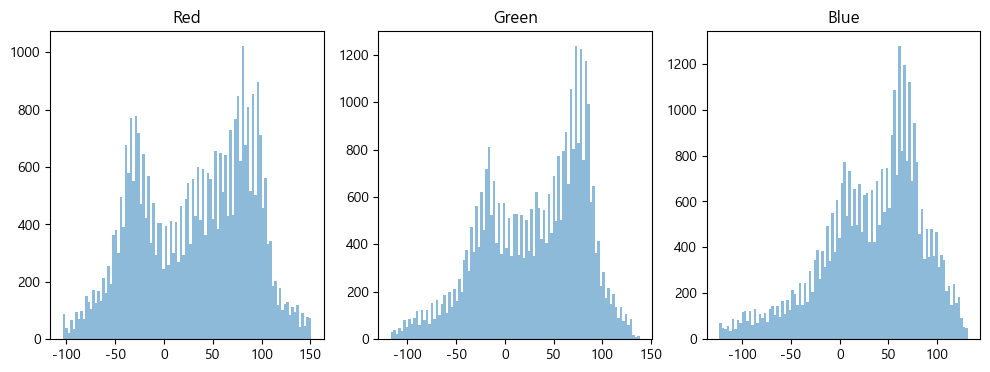

In [39]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

# RGB를 전처리한 결과를 히스토그램으로 시각화
scaled_image_resnet = resnet_preprocess_input(image)
show_pixel_histogram(scaled_image_resnet)

#### 중간 분석
- Resnet50V2 역시 TensorFlow 방식으로 스케일링 함

#### flow 생성
> - 위의 DataFrame으로부터 flow

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 데이터 전처리 함수 - 스케일링
def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf':
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch':
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

# Resnet50V2 모델을 사용하기 때문에, 해당 모델의 스케일링 방식인 tf 사용 (tf가 default라 따로 기재 안 함)
train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

# 각 dataframe으로부터 flow한 train, validation, test flow 생성 - 모델 fit 및 evalutaion 용도
train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='binary',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                           x_col='file_paths', 
                                                           y_col='target_names',
                                                           target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                           class_mode='binary')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                               x_col='file_paths', 
                                               y_col='target_names',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode='binary')

# 각 flow의 클래스 종류 출력 (제대로 생성되었는지 확인)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12461 validated image filenames belonging to 2 classes.
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


#### 모델 생성 및 학습

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 모델 생성 함수
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    # 입력받은 model_name에 따라 다른 모델 사용
    # VGG16
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # ResNet50V2
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Xception (Inception 기반)
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Mobilenet
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 모델의 출력값을 변수 x에 할당
    x = model.output

    # Classifier
    # VGG16 이외의 모델은 층 구조가 깊기 때문에 Dropout 사용 
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
        
    x = Dense(200, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # 이미지 데이터의 클래스가 binary였기 때문에 Dense는 1로 지정
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)

    # 함수의 verbose 파라미터를 True로 설정 시, 모델 객체 생성과 함께 구조도 같이 출력
    if verbose:
        model.summary()

    # 모델 객체 반환
    return model

In [50]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

# Resnet50V2 모델 생성 (+ 모델 구조 출력)
model = create_model(model_name='resnet50', verbose=True)

# 모델 컴파일링
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,974,801 (91.46 MB)

 Trainable params: 23,929,361 (91.28 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/resnet50v2/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [52]:
import gc

# Garbage Collecting
gc.collect()

5511

In [53]:
N_EPOCHS = 10

# 모델 학습
history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS,
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 453s 700ms/step - acc: 0.5982 - loss: 0.7758 - val_acc: 0.6044 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 530s 847ms/step - acc: 0.7664 - loss: 0.5112 - val_acc: 0.5298 - val_loss: 136.7856 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 835ms/step - acc: 0.7787 - loss: 0.4945 - val_acc: 0.7116 - val_loss: 4.0366 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 526s 841ms/step - acc: 0.8075 - loss: 0.4431 - val_acc: 0.8528 - val_loss: 0.3437 - learning_rate: 1.0000e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 531s 849ms/step - acc: 0.8644 - loss: 0.3304 - val_acc: 0.8552 - val_loss: 0.3362 - learning_rate: 1.0000e-04
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 531s 850ms/step - acc: 0.8848 - loss: 0.2896 - val_acc: 0.8622 - val_loss: 0.3171 - learning_rate: 1.0000e-04
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 528s 845ms/step - acc: 0.8979 - loss: 0.2625 - val_acc: 0.8696 - val_l

In [54]:
# 모델 평가
model.evaluate(test_flow)

390/390 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - acc: 0.8772 - loss: 0.3800


[0.3739798367023468, 0.876815676689148]

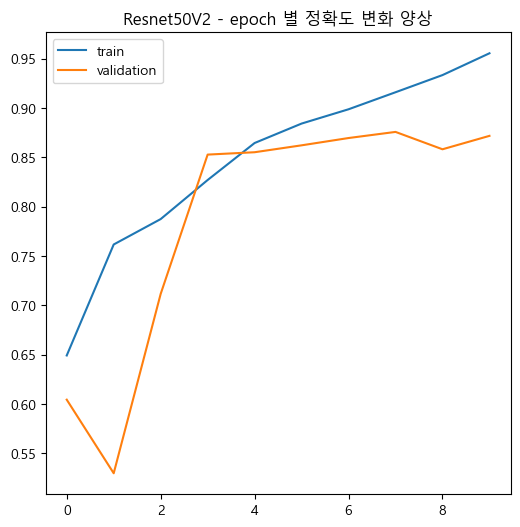

In [55]:
import matplotlib.pyplot as plt

# eopch 별 정확도 변화를 시각화하는 함수
def show_history(history):
    # 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.title('Resnet50V2 - epoch 별 정확도 변화 양상')
    plt.legend()

# epoch 별 정확도 변화 시각화
show_history(history)

#### 2nd Cycle - Resnet50V2 모델 훈련 결과
- callback으로 learning rate를 조절하고, Early Stopping을 걸어줌으로써  
  우수한 성능의 모델을 얻을 수 있었음

### 💻 3rd Cycle - 미세 조정
- 위 두 모델의 훈련 시간이 너무나 오래 걸렸기 때문에 미세 조정을 통해 학습 시간을 효율적으로 단축
- 이번에 사용할 모델은 두 모델 중 더 나은 예측 성능을 보여준 VGG16
> - 유사도가 어느 정도 있고, 데이터 수도 많기 때문에  
Convolutional Base의 하위 n개 층만 unfreeze

#### 모델 생성

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 모델 생성 함수
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    # 입력받은 model_name에 따라 다른 모델 사용
    # VGG16
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # ResNet50V2
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Xception (Inception 기반)
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Mobilenet
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 모델의 출력값을 변수 x에 할당
    x = model.output

    # Classifier
    # VGG16 이외의 모델은 층 구조가 깊기 때문에 Dropout 사용 
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
        
    x = Dense(200, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # 이미지 데이터의 클래스가 binary였기 때문에 Dense는 1로 지정
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)

    # 함수의 verbose 파라미터를 True로 설정 시, 모델 객체 생성과 함께 구조도 같이 출력
    if verbose:
        model.summary()

    # 모델 객체 반환
    return model

#### Sequence

In [26]:
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import numpy as np
import cv2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# Dataset 클래스(keras의 Sequence 상속)
class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # shuffle=True일 경우, 매 epoch 종료 시 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__(): 전체 데이터 건 수에서 batch_size 단위로 나눈 데이터 수 (소수점 올림)
    def __len__(self, ):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # __getitem__(): batch_size 단위로 이미지 배열과 target 데이터들을 가져온 뒤, 변환한 값 리턴
    # 쉽게 말해 전처리 메소드
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 0으로만 채운(초기화) 4차원 (batch_size, IMAGE_SIZE, IMAGE_SIZE, 3(RGB)) ndarray 할당
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 각 이미지 별로 아래의 전처리 실행
        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # aug가 전달되었을 경우, 해당 Augmentation 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # 전처리 함수가 전달되었을 경우, 해당 함수로 image 추가 전처리
            if self.preprocess is not None:
                self.preprocess(image)

            # results_batch의 i번 인덱스에 전처리된 이미지 추가
            results_batch[i] = image

        # 재정의 된 __getitem__() 메소드의 반환값
        # Augmentation 적용(또는 미적용) 된 문제(이미지, results_batch)와 정답(targets_batch) list 반환
        return results_batch, targets_batch

    # __init__() 안 shuffle 하는 함수 정의
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

#### 미세 조정에 사용할 데이터

In [27]:
from tensorflow.keras.applications.mobilenet import preprocess_input as moblienet_preprocess_input
import albumentations as A

# train, validation, test 데이터의 문제(이미지 경로)와 정답(targets)를 변수에 할당
# target 데이터는 get_dummies를 통해 원핫 인코딩
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values

In [28]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

# train, validation, test 데이터 세트 객체 생성
train_dataset = Dataset(train_file_paths,
                        train_targets,
                        batch_size=BATCH_SIZE,
                        preprocess=vgg_preprocess_input,
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths,
                             validation_targets,
                             batch_size=BATCH_SIZE,
                             preprocess=vgg_preprocess_input)

test_dataset = Dataset(test_file_paths,
                       test_targets,
                       batch_size=BATCH_SIZE,
                       preprocess=vgg_preprocess_input)

#### 모델 구조 확인
- unfreeze 할 층을 결정하기 위함

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

# VGG16 모델 생성 후 컴파일링
model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │         102,6

 Total params: 14,817,489 (56.52 MB)

 Trainable params: 14,817,489 (56.52 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 기존 모델에서 freezing 된 layer 확인
for i, layer in enumerate(model.layers[:-3]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

# Classifier만 unfreeze
print('\n######### classifier layers ######### ')
for layer in model.layers[-3:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_3 trainable: False
2 . block1_conv1 trainable: False
3 . block1_conv2 trainable: False
4 . block1_pool trainable: False
5 . block2_conv1 trainable: False
6 . block2_conv2 trainable: False
7 . block2_pool trainable: False
8 . block3_conv1 trainable: False
9 . block3_conv2 trainable: False
10 . block3_conv3 trainable: False
11 . block3_pool trainable: False
12 . block4_conv1 trainable: False
13 . block4_conv2 trainable: False
14 . block4_conv3 trainable: False
15 . block4_pool trainable: False
16 . block5_conv1 trainable: False
17 . block5_conv2 trainable: False
18 . block5_conv3 trainable: False
19 . block5_pool trainable: False

######### classifier layers ######### 
global_average_pooling2d_3 trainable: True
dense_3 trainable: True
output trainable: True


#### 중간 분석
- 12번 층(block4_conv1)부터 학습
> - 하위 2개 층만 unfreeze

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/vgg16/fine_tuning/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [40]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 미세 조정 모듈
def fine_tune(datas, model_name, preprocess, aug=None):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10

    # 받은 데이터(Tuple)로 train, validation, test 데이터 분할 
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # train, validation 데이터 세트 객체 생성
    train_dataset = Dataset(train_file_paths,
                        train_targets,
                        batch_size=BATCH_SIZE,
                        aug=aug,
                        preprocess=preprocess,
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths,
                                 validation_targets,
                                 batch_size=BATCH_SIZE,
                                 preprocess=preprocess)

    # 모델 생성
    model = create_model(model_name=model_name, verbose=True)

    # 가중치 불러온 다음 컴파일링
    # VGG16 모델만 사용했을 때, 아래의 가중치를 산출한 epoch 이후 발산 현상이 확인되었으므로 learning rate 하향 조정
    model.load_weights('./callback_files/vgg16/cycle1/weights.011-0.2364-0.9114.weights.h5')
    model.compile(optimizer=Adam(1e-5), loss=BinaryCrossentropy(), metrics=['acc'])

    # feature extractor(Convolutional Base) layer들을 전부 freeze
    for layer in model.layers[:-3]:
        layer.trainable = False

    # Classifier만 fit
    model.fit(train_dataset,
              batch_size=BATCH_SIZE,
              epochs=FIRST_EPOCHS,
              validation_data=validation_dataset,
              callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 부분 freeze - 12 ~ 19번 layer, convolution Base의 최하단 층 2개만 unfreeze
    for layer in model.layers[12:20]:
        layer.trainable = True
        
    model.compile(optimizer=Adam(1e-5), loss=BinaryCrossentropy(), metrics=['acc'])

    # freeze 이후 모델 fit
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=SECOND_EPOCHS,
                        validation_data=validation_dataset,
                        callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 모델과 history 반환
    return model, history

In [41]:
import gc

# Garbage Collecting
gc.collect()

3063

In [42]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

# 미세 조정 함수 사용 - VGG16 모델 생성 + 미세 조정
model, history = fine_tune((train_file_paths, train_targets, \
                            validation_file_paths, validation_targets, \
                            test_file_paths, test_targets),
                           'vgg16',
                           vgg_preprocess_input)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 200)                 │         102,6

 Total params: 14,817,489 (56.52 MB)

 Trainable params: 14,817,489 (56.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 259s 258ms/step - acc: 0.6136 - loss: 15.3116 - val_acc: 0.6236 - val_loss: 10.0527 - learning_rate: 1.0000e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 283s 283ms/step - acc: 0.6436 - loss: 6.0866 - val_acc: 0.8218 - val_loss: 1.4540 - learning_rate: 1.0000e-05
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 274s 274ms/step - acc: 0.8607 - loss: 1.2063 - val_acc: 0.8134 - val_loss: 1.4081 - learning_rate: 1.0000e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 290s 290ms/step - acc: 0.8579 - loss: 1.1894 - val_acc: 0.8382 - val_loss: 1.3362 - learning_rate: 1.0000e-05
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 291s 291ms/step - acc: 0.8644 - loss: 0.8653 - val_acc: 0.8314 - val_loss: 1.2779 - learning_rate: 1.0000e-05
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 286s 286ms/step - acc: 0.8712 - loss: 1.2002 - val_acc: 0.8244 - val_loss: 1.2328 - learning_rate: 1.0000e-05
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 288s 288ms/step - acc: 0.8745 - loss: 0.5990

#### ⌚ 미세 조정(Fine Tuning) 전후 epoch 당 평균 학습시간 비교
- 적용 전: 1 epoch 당 평균 **892.3초 (약 14분 52초)**
- 적용 후: 1 epoch 당 평균 **525.8초 (약 8분 46초)**

<br>

- 미세 조정을 적용하기 전, 즉 VGG16의 Convolutional Base를 전부 학습시켰을 때에 비해 학습 시간이 약 41% 단축됨

In [43]:
# 모델 성능 평가
model.evaluate(test_dataset)

624/624 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - acc: 0.8721 - loss: 0.4685


[0.8233288526535034, 0.8643768429756165]

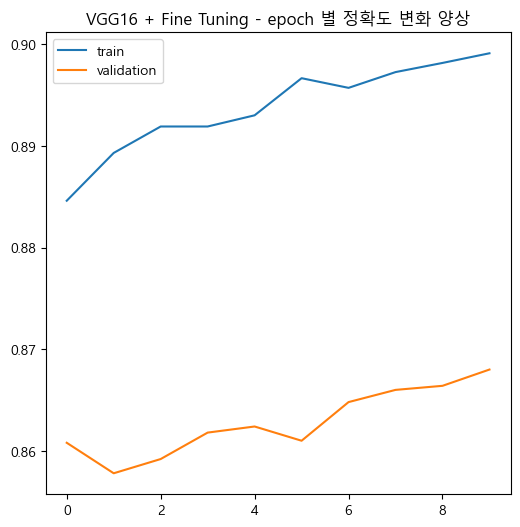

In [45]:
import matplotlib.pyplot as plt

# eopch 별 정확도 변화를 시각화하는 함수
def show_history(history):
    # 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(6, 6))
    # plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.title('VGG16 + Fine Tuning - epoch 별 정확도 변화 양상')
    plt.legend()

# epoch 별 정확도 변화 시각화
show_history(history)

#### 🤖 3rd Cycle - VGG16 + 미세 조정 후 성능 검증
- 시각화를 통해 모델이 실제 이미지를 얼마나 잘 예측하는지 확인

In [59]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# train, validation, test DataFrame으로부터 file_paths(이미지)의 경로값과 원핫 인코딩 된 targets 가져오기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


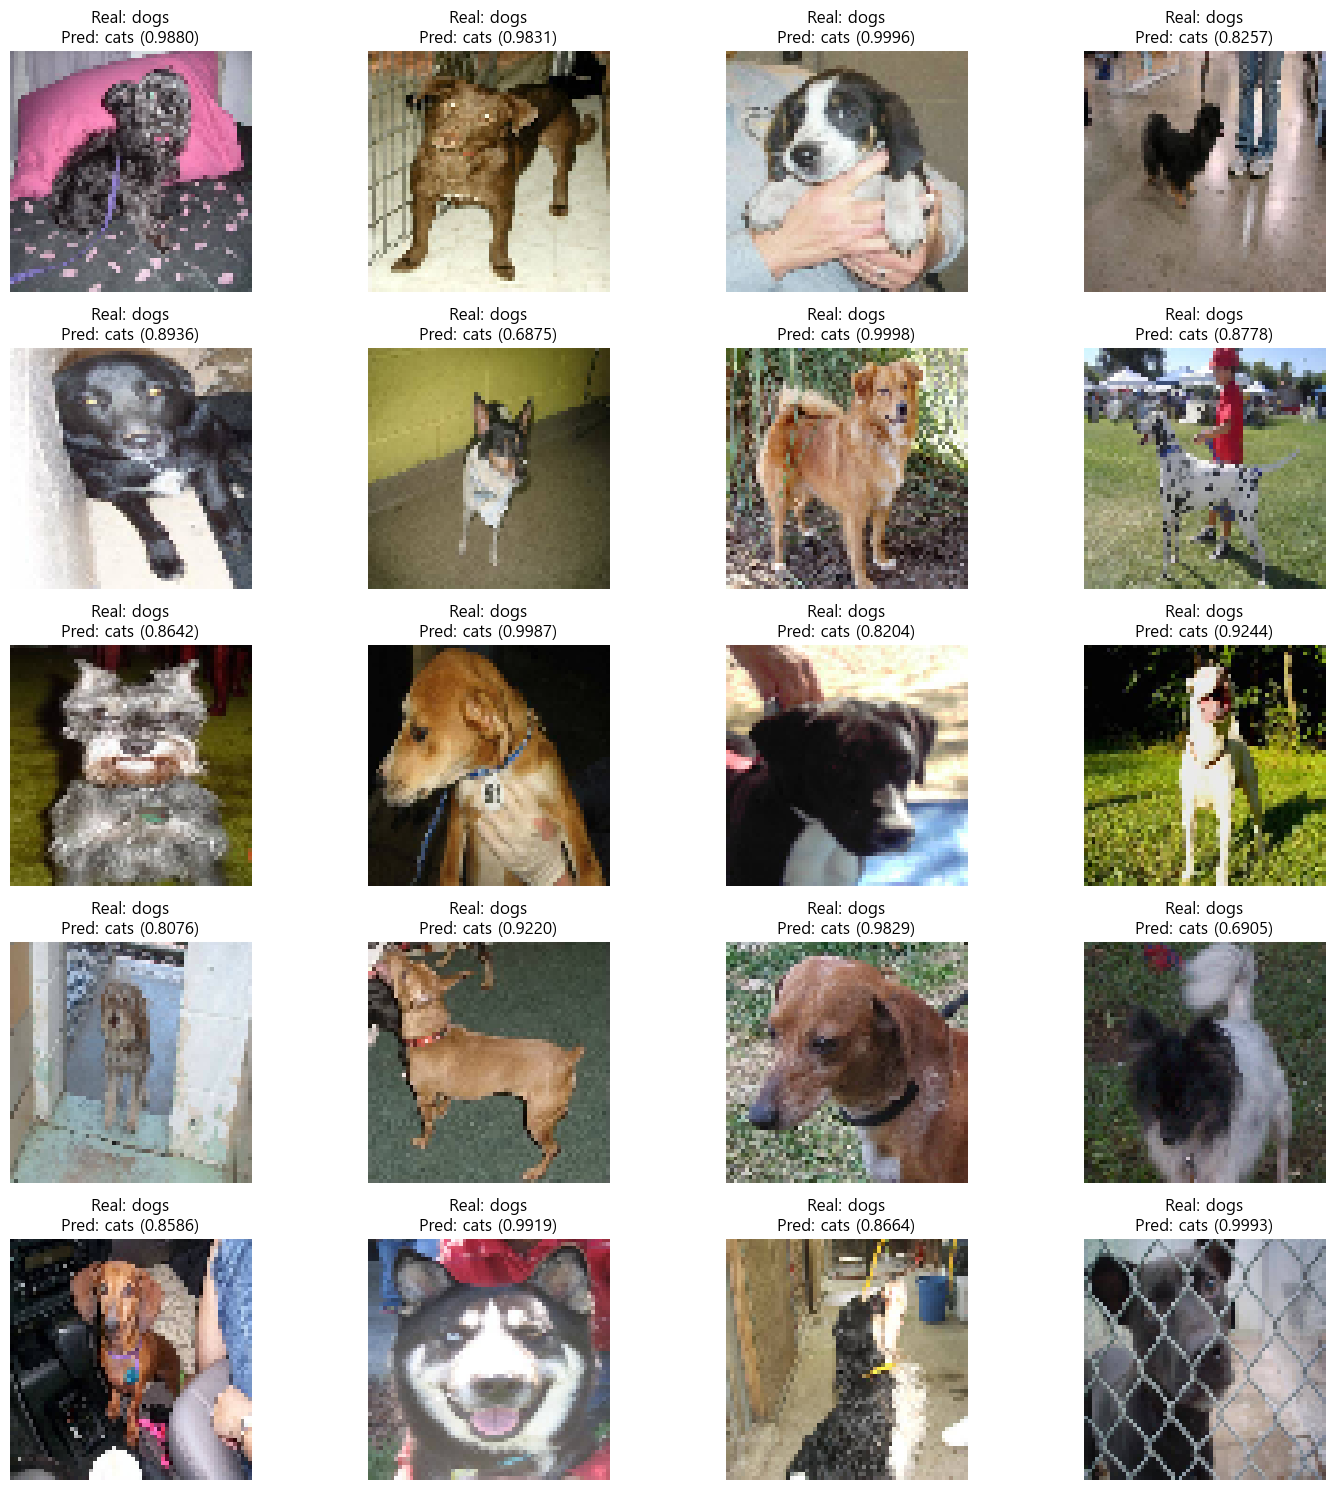

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 데이터 클래스
class_names = ['cats', 'dogs']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 10000
end_index = 10020

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들과 예측 클래스 시각화
for idx, i in enumerate(range(start_index, end_index)):
    # 위 인덱스 번호를 하나하나 순회하면서 이미지 파일 경로 가져오기
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델로 이미지 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

#### 이슈
- 현재 개도 고양이라고 인식하는 이슈가 발생
- 데이터 일반화가 필요해 보이며, 필요하다면 Augmentation 적용 

#### 3rd Cycle - VGG16 모델 + 미세 조정 후 훈련 결과
- 미세 조정 적용 전과 비슷한 성능의 모델이 학습됨
- 하지만, 미세 조정 이전에 비해 학습 시간이 크게 단축되어, 보다 효율적으로 학습할 수 있었음

### 🚩 4th Cycle - Classifier만 unfreeze
- 피드백 사항으로, Classifier 층만 unfreeze하여 학습 진행
> - 원본 VGG16 모델이 개와 고양이를 잘 구별했기 때문
- 위의 Convolutional Base도 학습시킨 모델과 성능 비교

#### Sequence

In [14]:
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import numpy as np
import cv2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# Dataset 클래스(keras의 Sequence 상속)
class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # shuffle=True일 경우, 매 epoch 종료 시 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__(): 전체 데이터 건 수에서 batch_size 단위로 나눈 데이터 수 (소수점 올림)
    def __len__(self, ):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # __getitem__(): batch_size 단위로 이미지 배열과 target 데이터들을 가져온 뒤, 변환한 값 리턴
    # 쉽게 말해 전처리 메소드
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 0으로만 채운(초기화) 4차원 (batch_size, IMAGE_SIZE, IMAGE_SIZE, 3(RGB)) ndarray 할당
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 각 이미지 별로 아래의 전처리 실행
        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # aug가 전달되었을 경우, 해당 Augmentation 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # 전처리 함수가 전달되었을 경우, 해당 함수로 image 추가 전처리
            if self.preprocess is not None:
                self.preprocess(image)

            # results_batch의 i번 인덱스에 전처리된 이미지 추가
            results_batch[i] = image

        # 재정의 된 __getitem__() 메소드의 반환값
        # Augmentation 적용(또는 미적용) 된 문제(이미지, results_batch)와 정답(targets_batch) list 반환
        return results_batch, targets_batch

    # __init__() 안 shuffle 하는 함수 정의
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

#### 미세 조정에 사용할 데이터

In [15]:
from tensorflow.keras.applications.mobilenet import preprocess_input as moblienet_preprocess_input
import albumentations as A

# train, validation, test 데이터의 문제(이미지 경로)와 정답(targets)를 변수에 할당
# target 데이터는 get_dummies를 통해 원핫 인코딩
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values

In [71]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# train, validation, test DataFrame으로부터 file_paths(이미지)의 경로값과 원핫 인코딩 된 targets 가져오기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

In [16]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

# train, validation, test 데이터 세트 객체 생성
train_dataset = Dataset(train_file_paths,
                        train_targets,
                        batch_size=BATCH_SIZE,
                        preprocess=vgg_preprocess_input,
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths,
                             validation_targets,
                             batch_size=BATCH_SIZE,
                             preprocess=vgg_preprocess_input)

test_dataset = Dataset(test_file_paths,
                       test_targets,
                       batch_size=BATCH_SIZE,
                       preprocess=vgg_preprocess_input)

#### 모델 생성 후 학습

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 모델 생성 함수
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    # 입력받은 model_name에 따라 다른 모델 사용
    # VGG16
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # ResNet50V2
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Xception (Inception 기반)
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Mobilenet
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 모델의 출력값을 변수 x에 할당
    x = model.output

    # Classifier
    # VGG16 이외의 모델은 층 구조가 깊기 때문에 Dropout 사용 
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
        
    x = Dense(200, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # 이미지 데이터의 클래스가 binary였기 때문에 Dense는 1로 지정
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)

    # 함수의 verbose 파라미터를 True로 설정 시, 모델 객체 생성과 함께 구조도 같이 출력
    if verbose:
        model.summary()

    # 모델 객체 반환
    return model

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/vgg16/fine_tuning02/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 미세 조정 모듈
def fine_tune(datas, model_name, preprocess, aug=None):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10

    # 받은 데이터(Tuple)로 train, validation, test 데이터 분할 
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # train, validation 데이터 세트 객체 생성
    train_dataset = Dataset(train_file_paths,
                        train_targets,
                        batch_size=BATCH_SIZE,
                        aug=aug,
                        preprocess=preprocess,
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths,
                                 validation_targets,
                                 batch_size=BATCH_SIZE,
                                 preprocess=preprocess)

    # 모델 생성
    model = create_model(model_name=model_name, verbose=True)

    # 가중치 불러온 다음 컴파일림
    model.load_weights('./callback_files/vgg16/cycle1/weights.011-0.2364-0.9114.weights.h5')

    # VGG16 모델에서 발산 현상이 관측되었으므로, learning rate 하향 조정 
    model.compile(optimizer=Adam(1e-5), loss=BinaryCrossentropy(), metrics=['acc'])

    # feature extractor(Convolutional Base) layer들을 전부 freeze
    for layer in model.layers[:-3]:
        layer.trainable = False

    # Classifier만 fit
    history = model.fit(train_dataset,
              batch_size=BATCH_SIZE,
              epochs=FIRST_EPOCHS,
              validation_data=validation_dataset,
              callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 이번 Cycle에서는 Convolutional Base unfreeze 안 함
    # # 부분 freeze - 12 ~ 19번 layer, convolution Base의 최하단 층 2개만 unfreeze
    # for layer in model.layers[12:20]:
    #     layer.trainable = True
        
    # model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

    # # freeze 이후 모델 fit
    # history = model.fit(train_dataset,
    #                     batch_size=BATCH_SIZE,
    #                     epochs=SECOND_EPOCHS,
    #                     validation_data=validation_dataset,
    #                     callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 모델과 history 반환
    return model, history

In [20]:
import gc

# Garbage Collecting
gc.collect()

0

In [86]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

# 미세 조정 함수 사용 - VGG16 모델 생성 + 미세 조정
model, history = fine_tune((train_file_paths, train_targets, \
                            validation_file_paths, validation_targets, \
                            test_file_paths, test_targets),
                           'vgg16',
                           vgg_preprocess_input)

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 200)                 │         102,6

 Total params: 14,817,489 (56.52 MB)

 Trainable params: 14,817,489 (56.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 251s 250ms/step - acc: 0.6139 - loss: 14.7575 - val_acc: 0.6246 - val_loss: 9.9043 - learning_rate: 1.0000e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 293s 292ms/step - acc: 0.6543 - loss: 5.5377 - val_acc: 0.8194 - val_loss: 1.4603 - learning_rate: 1.0000e-05
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 310s 309ms/step - acc: 0.8519 - loss: 0.8694 - val_acc: 0.8206 - val_loss: 1.4066 - learning_rate: 1.0000e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 313s 312ms/step - acc: 0.8608 - loss: 0.7039 - val_acc: 0.8198 - val_loss: 1.3544 - learning_rate: 1.0000e-05
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 317s 316ms/step - acc: 0.8675 - loss: 1.0924 - val_acc: 0.8390 - val_loss: 1.2900 - learning_rate: 1.0000e-05
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 332s 332ms/step - acc: 0.8721 - loss: 0.9623 - val_acc: 0.8368 - val_loss: 1.2339 - learning_rate: 1.0000e-05
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 334s 334ms/step - acc: 0.8749 - loss: 0.6645 - val_acc: 

#### ⌚ 미세 조정(Fine Tuning) 전후 epoch 당 평균 학습시간 비교
- 적용 전: 1 epoch 당 평균 **892.3초 (약 14분 52초)**
- 적용 후: 1 epoch 당 평균 **314.8초 (약 5분 15초)**

<br>

- 미세 조정 적용 전에 비해 학습 시간이 약 65% 단축됨

In [87]:
# 모델 성능 평가
model.evaluate(test_dataset)

624/624 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - acc: 0.8025 - loss: 1.0117


[2.6936798095703125, 0.8451167345046997]

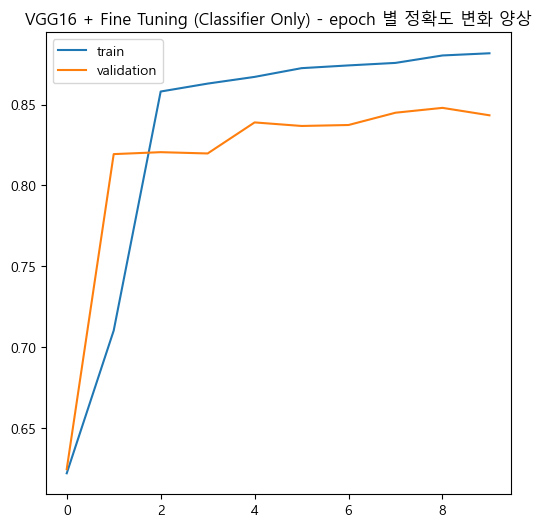

In [88]:
import matplotlib.pyplot as plt

# eopch 별 정확도 변화를 시각화하는 함수
def show_history(history):
    # 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.title('VGG16 + Fine Tuning (Classifier Only) - epoch 별 정확도 변화 양상')
    plt.legend()

# epoch 별 정확도 변화 시각화
show_history(history)

#### 🤖 4th Cycle - VGG16 + Classifier만 unfreeze 후 성능 검증
- 시각화를 통해 모델이 실제 이미지를 얼마나 잘 예측하는지 확인

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

# VGG16 모델 생성 (+ 모델 구조 출력)
model = create_model(model_name='vgg16', verbose=True)

# 가중치 불러오기
model.load_weights('./callback_files/vgg16/fine_tuning02/weights.010-1.0035-0.8817.weights.h5')

# 모델 컴파일링
model.compile(optimizer=Adam(1e-5), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         102,6

 Total params: 14,817,489 (56.52 MB)

 Trainable params: 14,817,489 (56.52 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# train, validation, test DataFrame으로부터 file_paths(이미지)의 경로값과 원핫 인코딩 된 targets 가져오기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


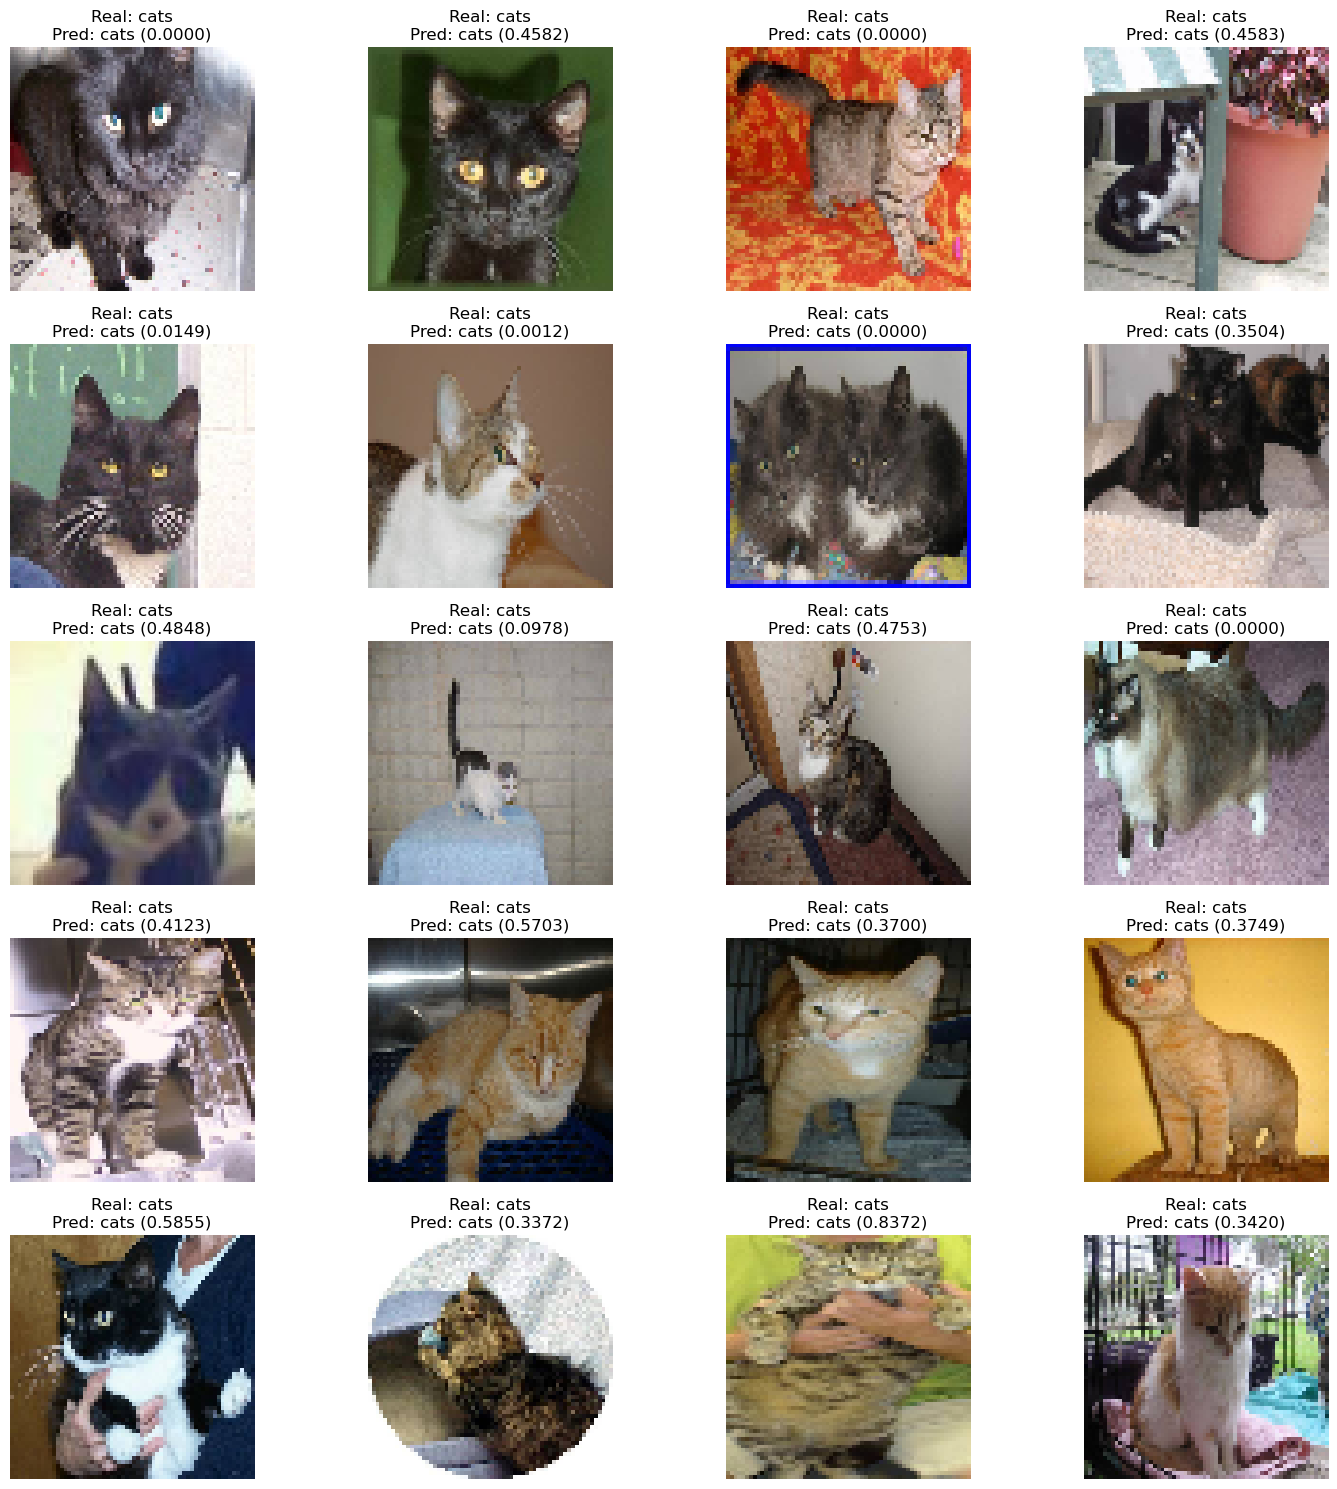

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 데이터 클래스
class_names = ['cats', 'dogs']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 100
end_index = 120

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들과 예측 클래스 시각화
for idx, i in enumerate(range(start_index, end_index)):
    # 위 인덱스 번호를 하나하나 순회하면서 이미지 파일 경로 가져오기
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델로 이미지 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

#### 4th Cycle - VGG16 모델 + Classifier만 unfreeze 후 훈련 결과
- 학습 과정에서 Convolutional Base를 거치지 않았기 때문에,  
  이전 사이클에 비해 학습 시간이 더욱 단축됨

### 🚩 요약 및 느낀점
- 이미지 데이터 수가 많았기 때문에 학습에도 많은 시간이 소요되었다.
- 미세 조정을 적용해서 Convoultional Base의 일부만 학습시킴으로써  
  정확도는 유지하면서 학습 시간은 획기적으로 단축시켰다.

- 고용량 모델을 학습시키려고 할 때마다 마주했던 긴 학습시간을 크게 단축시킴으로써  
  모델 학습을 더욱 효율적으로 할 수 있었다.